In [86]:
#Load Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex

import warnings
warnings.filterwarnings("ignore")

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",300)
pd.set_option("display.max_columns",300)

In [87]:
# Get the dataset
telecomData = pd.read_csv("telecom_churn_data.csv")

In [88]:
#check the data
telecomData.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [89]:
#Check the metadata with verbose( Show all the column names)
telecomData.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [90]:
# Define a function to segregate columns
def segregate_columns(dataframe):
    # Categorical columns separation
    catColumns = dataframe.select_dtypes(include=['object']).columns.tolist()
    print(f"Total Categorical columns: {len(catColumns)}")

    # ID columns separation
    idColumns = ["mobile_number", "circle_id"]
    print(f"Total ID columns: {len(idColumns)}")

    # Numeric columns separation
    numColumns = [col for col in dataframe.columns if col not in catColumns + idColumns]
    print(f"Total Numeric columns: {len(numColumns)}")

    return catColumns, idColumns, numColumns

# Call the function on your dataframe
catColumns, idColumns, numColumns = segregate_columns(telecomData) 

Total Categorical columns: 12
Total ID columns: 2
Total Numeric columns: 212


In [91]:
#check the date columns
telecomData[catColumns].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [92]:
#check the Null values column wise
(telecomData.isnull().sum()/len(telecomData)).sort_values(ascending = False)

arpu_3g_6                   0.748467
night_pck_user_6            0.748467
total_rech_data_6           0.748467
arpu_2g_6                   0.748467
max_rech_data_6             0.748467
fb_user_6                   0.748467
av_rech_amt_data_6          0.748467
date_of_last_rech_data_6    0.748467
count_rech_2g_6             0.748467
count_rech_3g_6             0.748467
date_of_last_rech_data_7    0.744287
total_rech_data_7           0.744287
fb_user_7                   0.744287
max_rech_data_7             0.744287
night_pck_user_7            0.744287
count_rech_2g_7             0.744287
av_rech_amt_data_7          0.744287
arpu_2g_7                   0.744287
count_rech_3g_7             0.744287
arpu_3g_7                   0.744287
total_rech_data_9           0.740777
count_rech_3g_9             0.740777
fb_user_9                   0.740777
max_rech_data_9             0.740777
arpu_3g_9                   0.740777
date_of_last_rech_data_9    0.740777
night_pck_user_9            0.740777
a

In [93]:
# when total_rech_data and date_of_last_rech_data is null, Check date_of_last_rech_data,total_rech_data,max_rech_data etc. 
telecomData[telecomData["total_rech_data_6"].isna() & telecomData["date_of_last_rech_data_6"].isna()][ \
    ["date_of_last_rech_data_6","total_rech_data_6","max_rech_data_6","max_rech_data_6","av_rech_amt_data_6"]]


,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,max_rech_data_6,av_rech_amt_data_6
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
99991,NaN,NaN,NaN,NaN,NaN
99992,NaN,NaN,NaN,NaN,NaN
99993,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN


In [94]:
# Columns which we have to impute as Zero.
zeroImpute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
# Put zero in these columns
telecomData[zeroImpute] = telecomData[zeroImpute].apply(lambda x: x.fillna(0))

In [95]:
# We will drop date columns and ID columns as these will not contribute further to our analysis.

telecomData.drop(columns=idColumns,inplace=True)
telecomData.drop(columns=catColumns,inplace=True)

In [96]:
# Check the columns associated with month 6 . From this, we can get an overview of columns/features in 7,8,9 months
month6Col = [col for col in telecomData.columns if "_6" in col]
print(len(month6Col))
month6Col

51


['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6']

In [97]:
# check how the data looks for month 6
telecomData[month6Col].head(10)

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2o_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,last_day_rch_amt_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
0,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4,362,252,252,1.0,252.0,0.0,1.0,252.0,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0
1,34.047,24.11,15.74,0.00,0.00,23.88,11.51,0.00,0.00,35.39,0.23,0.00,0.00,0.0,0.23,0.0,4.68,0.00,40.31,1.61,17.48,0.00,19.09,0.00,5.90,0.00,0.0,5.90,26.83,0.00,1.83,0.00,4,74,44,44,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
2,167.690,11.54,143.33,0.00,0.00,7.19,29.34,24.11,0.00,60.66,4.34,41.81,1.48,0.0,47.64,0.0,46.56,0.45,155.33,115.69,14.38,99.48,229.56,72.41,45.18,21.73,0.0,139.33,370.04,0.21,0.00,0.93,5,168,86,0,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
3,221.338,99.91,123.31,0.00,0.00,73.68,107.43,1.91,0.00,183.03,26.23,2.99,0.00,0.0,29.23,0.0,10.96,0.00,223.23,62.08,113.96,57.43,233.48,43.48,1.33,1.18,0.0,45.99,280.08,0.59,0.00,0.00,10,230,60,30,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
4,261.636,50.31,76.96,0.00,0.00,50.31,67.64,0.00,0.00,117.96,0.00,9.31,0.00,0.0,9.31,0.0,0.00,0.00,127.28,105.68,106.84,1.50,214.03,0.00,1.93,0.00,0.0,1.93,216.44,0.00,0.00,0.48,5,196,56,50,1.0,56.0,1.0,0.0,56.0,0.00,0.00,0.00,0.00,0.0,0,1,0,0,0.0
5,50.258,50.16,19.28,0.00,0.00,50.16,16.39,0.00,0.00,66.56,0.00,0.00,2.88,0.0,2.88,0.0,0.00,0.00,69.44,28.73,49.19,0.00,77.93,0.00,0.00,77.03,0.0,77.03,155.39,0.43,0.00,0.00,2,120,120,120,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
6,429.023,71.03,262.73,0.00,0.00,71.03,252.23,10.38,0.11,333.64,0.00,0.00,0.00,0.0,0.00,0.0,0.11,0.00,333.76,1857.99,248.64,20.24,2126.89,0.00,1.39,0.00,0.0,1.39,2128.41,0.00,0.00,0.11,15,499,90,37,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
7,1069.180,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.00,422.16,4.30,49.89,6.66,0.0,60.86,0.0,4.50,0.00,487.53,58.14,217.56,152.16,427.88,36.89,91.44,52.19,0.0,180.54,626.46,0.21,2.06,15.74,5,1580,1580,0,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
8,378.721,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.00,378.09,116.56,13.69,0.00,0.0,130.26,0.0,0.00,0.00,508.36,23.84,57.58,0.00,81.43,0.00,22.43,0.00,0.0,22.43,103.86,0.00,0.00,0.00,19,437,90,50,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
9,119.518,33.89,63.48,0.00,0.00,33.89,38.03,0.00,0.00,71.93,0.00,25.45,0.00,0.0,25.45,0.0,0.66,0.00,98.04,129.34,132.94,0.40,262.69,0.30,32.86,0.00,0.0,33.16,303.98,0.00,8.11,0.00,4,220,110,110,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN


In [98]:
# Check again the null values percentages
(telecomData.isnull().sum()/len(telecomData)).sort_values(ascending = False).head(50)

count_rech_2g_6     0.748467
night_pck_user_6    0.748467
fb_user_6           0.748467
arpu_2g_6           0.748467
arpu_3g_6           0.748467
count_rech_3g_6     0.748467
count_rech_2g_7     0.744287
count_rech_3g_7     0.744287
night_pck_user_7    0.744287
arpu_3g_7           0.744287
arpu_2g_7           0.744287
fb_user_7           0.744287
night_pck_user_9    0.740777
arpu_3g_9           0.740777
count_rech_3g_9     0.740777
fb_user_9           0.740777
arpu_2g_9           0.740777
count_rech_2g_9     0.740777
arpu_3g_8           0.736607
arpu_2g_8           0.736607
night_pck_user_8    0.736607
count_rech_2g_8     0.736607
fb_user_8           0.736607
count_rech_3g_8     0.736607
std_og_mou_9        0.077451
std_og_t2c_mou_9    0.077451
loc_ic_t2t_mou_9    0.077451
isd_og_mou_9        0.077451
std_og_t2f_mou_9    0.077451
og_others_9         0.077451
std_ic_t2t_mou_9    0.077451
loc_ic_t2m_mou_9    0.077451
loc_ic_t2f_mou_9    0.077451
loc_ic_mou_9        0.077451
std_ic_t2m_mou

In [99]:
# Check night_pck_user unique values in month 6
telecomData["night_pck_user_6"].unique()

array([ 0., nan,  1.])

In [100]:
#Check the percetages null values of these columns
catColumns = ["night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9","fb_user_6",          
"fb_user_7",          
"fb_user_8",           
"fb_user_9"]

telecomData[catColumns].isna().sum()/len(telecomData)

night_pck_user_6    0.748467
night_pck_user_7    0.744287
night_pck_user_8    0.736607
night_pck_user_9    0.740777
fb_user_6           0.748467
fb_user_7           0.744287
fb_user_8           0.736607
fb_user_9           0.740777
dtype: float64

In [101]:
#Fill NaN value as -1 to mark missing value
telecomData[catColumns] = telecomData[catColumns].fillna(-1)

In [102]:
# Check if the null value is filled with -1
telecomData[catColumns].isna().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [103]:
#Check the null value pecentage
(telecomData.isna().sum()/len(telecomData)).sort_values(ascending=False)

arpu_3g_6             0.748467
count_rech_3g_6       0.748467
count_rech_2g_6       0.748467
arpu_2g_6             0.748467
arpu_3g_7             0.744287
count_rech_3g_7       0.744287
count_rech_2g_7       0.744287
arpu_2g_7             0.744287
count_rech_3g_9       0.740777
arpu_3g_9             0.740777
arpu_2g_9             0.740777
count_rech_2g_9       0.740777
count_rech_2g_8       0.736607
count_rech_3g_8       0.736607
arpu_2g_8             0.736607
arpu_3g_8             0.736607
std_og_t2t_mou_9      0.077451
std_og_t2m_mou_9      0.077451
std_og_t2f_mou_9      0.077451
std_og_t2c_mou_9      0.077451
std_og_mou_9          0.077451
spl_og_mou_9          0.077451
og_others_9           0.077451
std_ic_t2t_mou_9      0.077451
loc_ic_t2t_mou_9      0.077451
loc_ic_t2m_mou_9      0.077451
loc_ic_t2f_mou_9      0.077451
loc_ic_mou_9          0.077451
loc_og_t2c_mou_9      0.077451
std_ic_t2m_mou_9      0.077451
std_ic_t2o_mou_9      0.077451
std_ic_mou_9          0.077451
spl_ic_m

In [104]:
def drop_columns_with_nulls(dataframe, threshold=0.5):
    '''
    dataframe: pandas DataFrame
    threshold: float, proportion of nulls in the column to drop it
    '''
    # Calculate proportion of nulls in each column
    null_proportions = dataframe.isna().mean()

    # Find columns to drop based on threshold
    columns_to_drop = null_proportions[null_proportions > threshold].index

    # Drop columns and return updated dataframe
    return dataframe.drop(columns=columns_to_drop)

In [105]:
# Use the function on your dataframe
telecomData = drop_columns_with_nulls(telecomData)

In [106]:
telecomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 196 entries, loc_og_t2o_mou to sep_vbc_3g
dtypes: float64(163), int64(33)
memory usage: 149.5 MB


In [107]:
# check the null value row wise.
telecomData.isna().sum(axis=1).sort_values(ascending = False).head(30)


51296    119
47936    119
48177    119
48376    119
48474    119
48582    119
48651    119
48707    119
48740    119
48839    119
49153    119
49211    119
49582    119
49594    119
49651    119
49772    119
49857    119
49903    119
49909    119
49981    119
50006    119
48138    119
47786    119
45426    119
47739    119
45836    119
46033    119
46295    119
46515    119
46694    119
dtype: int64

In [108]:
# check the null value again
(telecomData.isna().sum()/len(telecomData)).sort_values(ascending = False)

std_ic_t2t_mou_9      0.077451
loc_og_t2t_mou_9      0.077451
loc_og_t2f_mou_9      0.077451
loc_og_t2c_mou_9      0.077451
loc_og_mou_9          0.077451
std_og_t2t_mou_9      0.077451
std_og_t2m_mou_9      0.077451
std_og_t2f_mou_9      0.077451
std_og_mou_9          0.077451
isd_og_mou_9          0.077451
spl_og_mou_9          0.077451
og_others_9           0.077451
spl_ic_mou_9          0.077451
loc_ic_t2t_mou_9      0.077451
loc_ic_t2m_mou_9      0.077451
loc_ic_t2f_mou_9      0.077451
loc_ic_mou_9          0.077451
std_ic_t2m_mou_9      0.077451
std_ic_t2f_mou_9      0.077451
std_ic_t2o_mou_9      0.077451
std_ic_mou_9          0.077451
loc_og_t2m_mou_9      0.077451
std_og_t2c_mou_9      0.077451
roam_og_mou_9         0.077451
ic_others_9           0.077451
onnet_mou_9           0.077451
roam_ic_mou_9         0.077451
isd_ic_mou_9          0.077451
offnet_mou_9          0.077451
spl_og_mou_8          0.053781
std_og_t2c_mou_8      0.053781
og_others_8           0.053781
std_og_t

In [109]:
# Find columns with only one unique value
zero_variance_columns = telecomData.columns[telecomData.nunique() == 1]

# Print these columns
print(f"Columns with zero variance: {zero_variance_columns.tolist()}")

# Create a list of these columns
columns_to_be_dropped = zero_variance_columns.tolist()
columns_to_be_dropped

Columns with zero variance: ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [110]:
# drop columns whish are having 1 unique values
telecomData.drop(columns=columns_to_be_dropped,inplace=True)

In [111]:
#check the shape
telecomData.shape

(99999, 185)

In [112]:
# Calculate the proportion of null values in each column
null_proportions = telecomData.isnull().mean()

# Sort the proportions in descending order
sorted_null_proportions = null_proportions.sort_values(ascending=False)

# Print the sorted proportions
print(sorted_null_proportions)

loc_ic_mou_9          0.077451
loc_og_mou_9          0.077451
std_ic_t2t_mou_9      0.077451
loc_og_t2m_mou_9      0.077451
loc_ic_t2t_mou_9      0.077451
spl_ic_mou_9          0.077451
std_ic_t2f_mou_9      0.077451
loc_og_t2f_mou_9      0.077451
loc_og_t2c_mou_9      0.077451
std_ic_t2m_mou_9      0.077451
loc_ic_t2m_mou_9      0.077451
std_og_t2t_mou_9      0.077451
og_others_9           0.077451
std_ic_mou_9          0.077451
std_og_t2m_mou_9      0.077451
std_og_t2f_mou_9      0.077451
std_og_mou_9          0.077451
spl_og_mou_9          0.077451
loc_og_t2t_mou_9      0.077451
isd_og_mou_9          0.077451
roam_og_mou_9         0.077451
roam_ic_mou_9         0.077451
loc_ic_t2f_mou_9      0.077451
onnet_mou_9           0.077451
offnet_mou_9          0.077451
isd_ic_mou_9          0.077451
ic_others_9           0.077451
std_og_mou_8          0.053781
std_ic_t2f_mou_8      0.053781
ic_others_8           0.053781
loc_ic_mou_8          0.053781
loc_ic_t2m_mou_8      0.053781
std_og_t

In [113]:
# Fill hr NaN as zero.
telecomData = telecomData.fillna(0)

In [114]:
telecomData.isna().sum()


arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
loc_og_mou_9          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7

In [115]:
telecomData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 185 entries, arpu_6 to sep_vbc_3g
dtypes: float64(152), int64(33)
memory usage: 141.1 MB


Removed the null values in the data, and the number of columns are reduced from 226 to 185.

Filter High Value Customer:

Customer who have rechaged with an amount equal to 70th percentile of average recharge amount in first two months (good phase).

In [116]:
def calculate_recharge_amounts(dataframe, months):
    for month in months:
        # Calculate total data recharge amount
        dataframe[f"total_data_recharge_amnt_{month}"] = dataframe[f"total_rech_data_{month}"] * dataframe[f"av_rech_amt_data_{month}"]
        # Calculate total recharge amount
        dataframe[f"total_recharge_amnt_{month}"] = dataframe[f"total_rech_amt_{month}"] + dataframe[f"total_data_recharge_amnt_{month}"]
    return dataframe

# Call the function on your dataframe
months = ['6', '7']  # Add more months as needed
telecomData = calculate_recharge_amounts(telecomData, months)

# Calculate average amount of recharge of 6th and 7th month
telecomData['average_amnt_6_7'] = (telecomData["total_recharge_amnt_6"] + telecomData["total_recharge_amnt_7"])/2

# Check the 70th percentile of "average_amnt_6_7"
quantile_70 = telecomData['average_amnt_6_7'].quantile(.70)

# Filter based on 70th percentile
telecomHighValue = telecomData[telecomData["average_amnt_6_7"] >= quantile_70]

# Delete the derived columns created in above step
columns_to_drop = ["total_data_recharge_amnt_6", "total_data_recharge_amnt_7", "total_recharge_amnt_6", "total_recharge_amnt_7", "average_amnt_6_7"]
telecomHighValue = telecomHighValue.drop(columns=columns_to_drop)

In [117]:
telecomHighValue.shape

(30001, 185)

In [118]:
# check the data
telecomHighValue.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00

Tagging churners:

Now we need to tag the churned customers (churn=1, else 0) based on the fourth month as follows:

Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase.

Based on these below attributes we need to decide churners:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [119]:
# Calculate total call in mins by adding Incoming and Outgoing calls
telecomHighValue['total_calls_9'] = telecomHighValue.total_ic_mou_9 + telecomHighValue.total_og_mou_9

In [120]:
# Calculate total 2G and 3G consumption of data
telecomHighValue["total_data_consumptions"] = telecomHighValue.vol_2g_mb_9 + telecomHighValue.vol_3g_mb_9

In [121]:
# Tag 1 as churner where total_calls_9=0 and total_data_consumptions=0 else 0 as non-churner
telecomHighValue["churn"] = (telecomHighValue.total_calls_9 == 0) & (telecomHighValue.total_data_consumptions == 0)

# Convert boolean to int (True becomes 1 and False becomes 0)
telecomHighValue["churn"] = telecomHighValue["churn"].astype(int)

In [122]:
# Check the percentages of churn and non churn data
print(telecomHighValue["churn"].value_counts(normalize=True))

churn
0    0.918636
1    0.081364
Name: proportion, dtype: float64


Churn percentage is close to 8 and non-churn percentage is close to 92.

In [123]:
# Drop the derived columns
telecomHighValue = telecomHighValue.drop(columns=["total_calls_9","total_data_consumptions"])

Deleting churn month column- 9th month.

After tagging churners, remove all the attributes corresponding to the churn phase i.e.
all attributes having ‘ _9’, etc. in their names.

These columns will not contribute to churn prediction as it contain data for users, where these users are already churned.

In [124]:
# Keep only columns not ending with '9'
cols_to_keep = [col for col in telecomHighValue.columns if not col.endswith('9')]
telecomHighValue = telecomHighValue[cols_to_keep]

In [125]:
# check the baisc info about high value customer
telecomHighValue.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, 0 to 99997
Data columns (total 141 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24   loc_o

30001 rows of recoreds and 141 columns to explore.

In [126]:
# Check the percenatges of churn and non-churn customers
telecomHighValue["churn"].value_counts(normalize=True)

churn
0    0.918636
1    0.081364
Name: proportion, dtype: float64

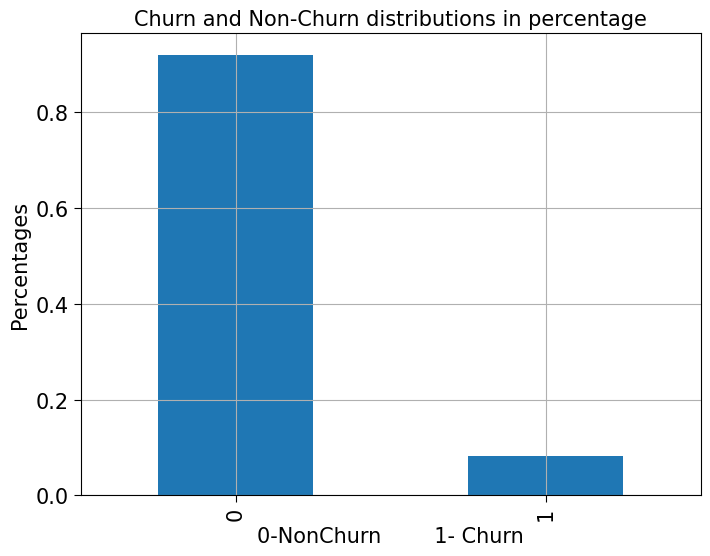

In [127]:
# plot to Check percetanges of churn and non churn data
plt.figure(figsize=(8,6))
telecomHighValue["churn"].value_counts(normalize=True).plot.bar()
plt.tick_params(size=5,labelsize = 15) 
plt.title("Churn and Non-Churn distributions in percentage",fontsize=15)
plt.ylabel("Percentages",fontsize=15)
plt.xlabel("0-NonChurn        1- Churn",fontsize=15)
plt.grid(0.3)
plt.show()

92% customer - non churn

8% customer - churn

In [128]:
# check basic statistics
telecomHighValue.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,378.103169,335.077044,16.110355,12.642504,

In [129]:
#check columns associated with month 6, From month 6 we can figure out how the columns and data are in other months
cols = [col for col in telecomHighValue.columns if "_6" in col]
cols

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6']

Derive new faetures by comparing month 8 features vs month 6 and month 7 features.

In [130]:
# List of columns to calculate difference
cols_to_diff = ['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_mou', 'std_og_mou', 
                'isd_og_mou', 'spl_og_mou', 'total_og_mou', 'loc_ic_mou', 'std_ic_mou', 'isd_ic_mou', 
                'spl_ic_mou', 'total_ic_mou', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 
                'total_rech_data', 'max_rech_data', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb']

# Function to calculate difference
def calculate_diff(dataframe, cols):
    for col in cols:
        dataframe[f'{col}_diff'] = dataframe[f'{col}_8'] - ((dataframe[f'{col}_6'] + dataframe[f'{col}_7']) / 2)
    return dataframe

# Call the function on your dataframe
telecomHighValue = calculate_diff(telecomHighValue, cols_to_diff)


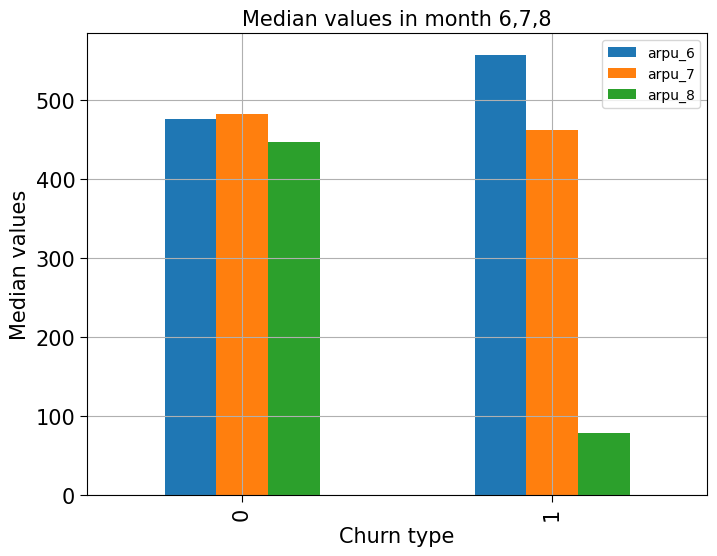

In [131]:
def plot_median_values(dataframe, churn_col, value_cols, aggfunc='median', figsize=(8, 6)):
    """
    Plots the median values for each churn type.

    dataframe: pandas DataFrame
    churn_col: str, name of the column indicating churn type
    value_cols: list of str, names of the columns containing the values to plot
    aggfunc: str, aggregation function to apply ('median', 'mean', etc.)
    figsize: tuple, size of the figure
    """
    dataframe.groupby(churn_col)[value_cols].agg(aggfunc).plot.bar(figsize=figsize)
    plt.title(f"{aggfunc.capitalize()} values in month 6,7,8", fontsize=15)
    plt.tick_params(size=5, labelsize=15)
    plt.ylabel(f"{aggfunc.capitalize()} values", fontsize=15)
    plt.xlabel("Churn type", fontsize=15)
    plt.grid(0.3)
    plt.show()

plot_median_values(telecomHighValue, "churn", ["arpu_6", "arpu_7", "arpu_8"])

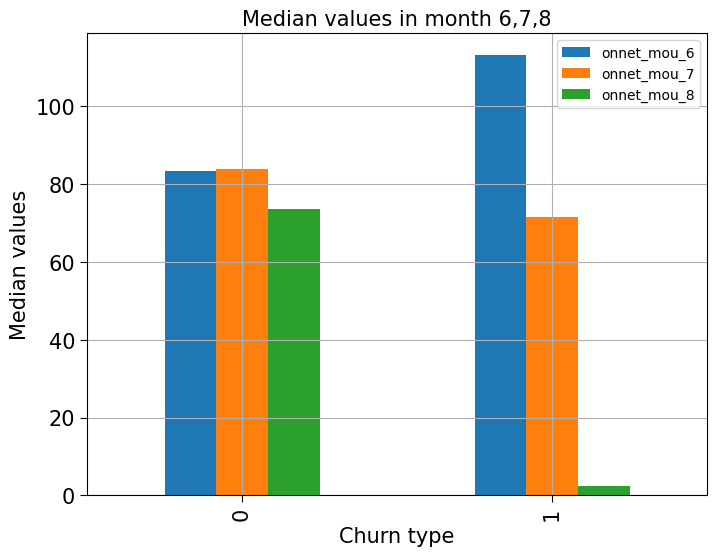

In [132]:
## Plot to visualize onnet_mou
plot_median_values(telecomHighValue, "churn", ["onnet_mou_6", "onnet_mou_7", "onnet_mou_8"])

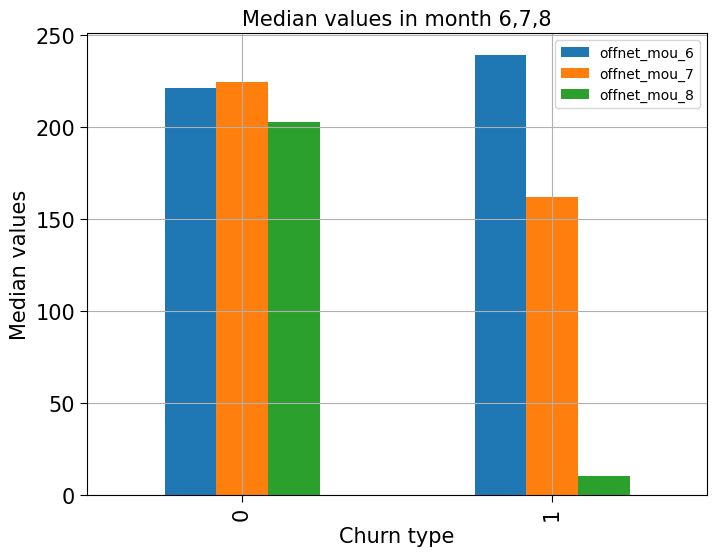

In [133]:
# Plot to visualize  offnet_mou
plot_median_values(telecomHighValue, "churn", ["offnet_mou_6", "offnet_mou_7", "offnet_mou_8"])

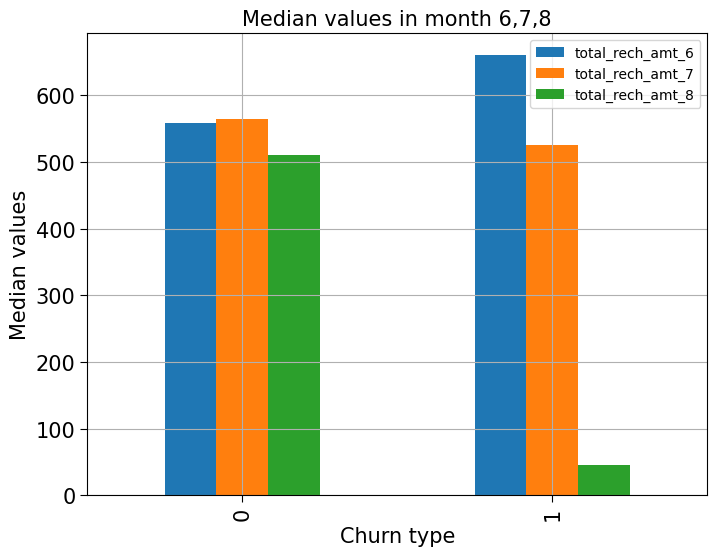

In [134]:
# Plot to visualize total_rech_amt
plot_median_values(telecomHighValue, "churn", ["total_rech_amt_6", "total_rech_amt_7", "total_rech_amt_8"])

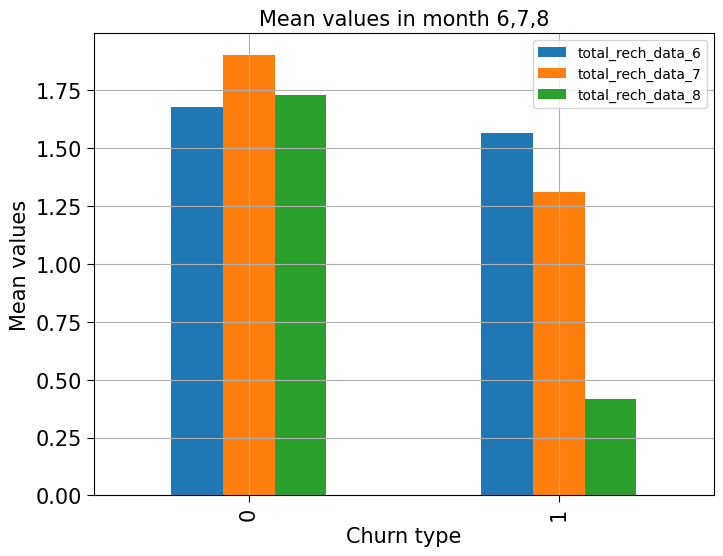

In [135]:
# Plot to visualize total_rech_data_
plot_median_values(telecomHighValue, "churn", ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8"], aggfunc='mean')

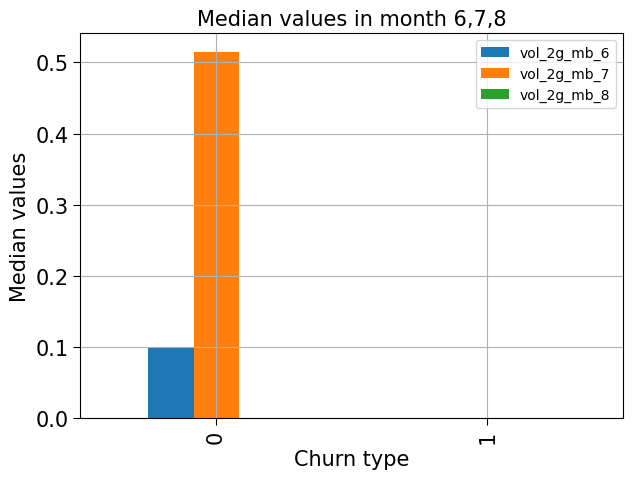

In [136]:
## Plot to visualize vol_2g_mb_6
plot_median_values(telecomHighValue, "churn", ["vol_2g_mb_6", "vol_2g_mb_7", "vol_2g_mb_8"], figsize=[7,5])

In [137]:
#Check the percenatges of churn in each category of Night Pack Users in month 8
pd.crosstab(telecomHighValue.churn, telecomHighValue.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [138]:
#Check the percenatges of churn in each category of Facebook Users in month 6
(pd.crosstab(telecomHighValue.churn, telecomHighValue.fb_user_8, normalize='columns')*100)

fb_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,93.231707,97.568644
1,14.10877,6.768293,2.431356


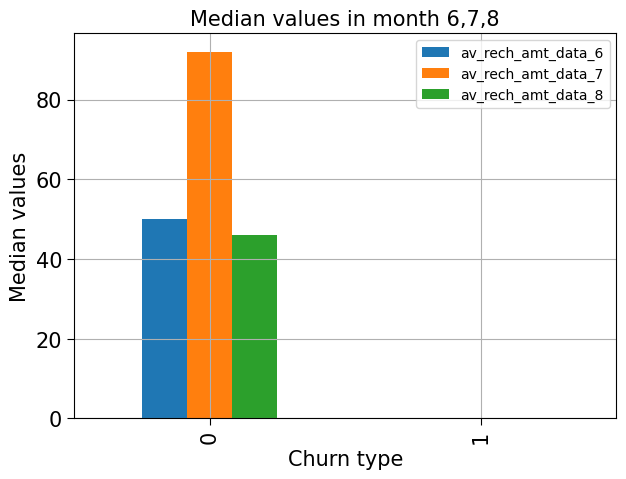

In [139]:
# plot to visualize av_rech_amt_data
plot_median_values(telecomHighValue, "churn", ["av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8"], figsize=[7,5])

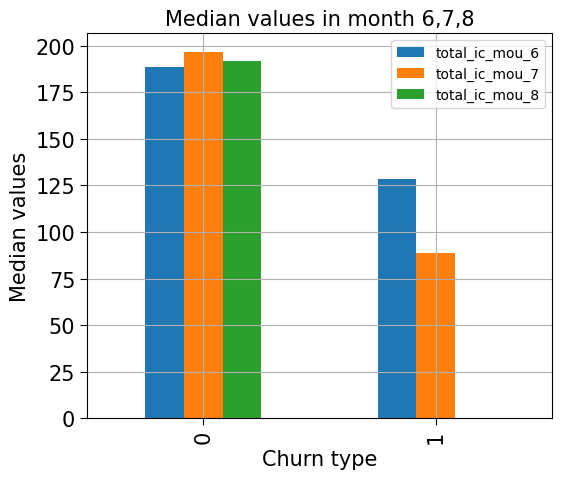

In [140]:
#Plot to visualize total_ic_mou
plot_median_values(telecomHighValue, "churn", ["total_ic_mou_6", "total_ic_mou_7", "total_ic_mou_8"], figsize=[6,5])


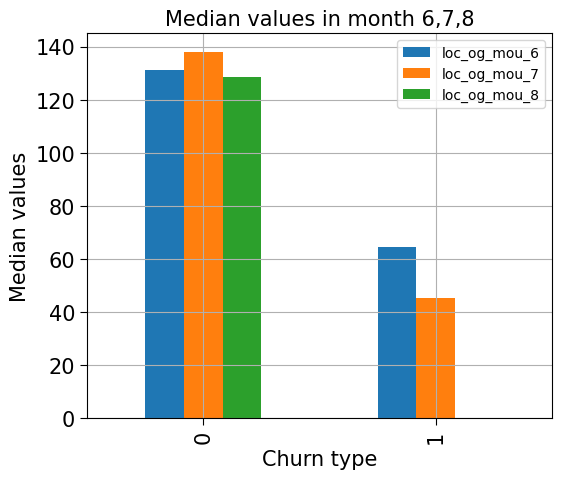

In [141]:
# plot to visualize loc_og_mou
plot_median_values(telecomHighValue, "churn", ["loc_og_mou_6", "loc_og_mou_7", "loc_og_mou_8"], figsize=[6,5])


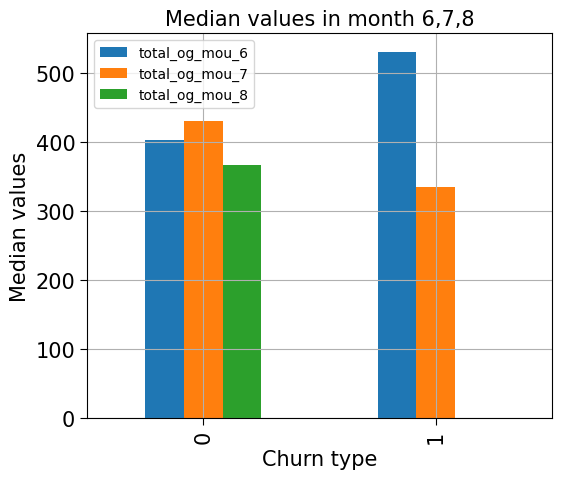

In [142]:
# plot to visualize total_og_mou_6
plot_median_values(telecomHighValue, "churn", ["total_og_mou_6", "total_og_mou_7", "total_og_mou_8"], figsize=[6,5])


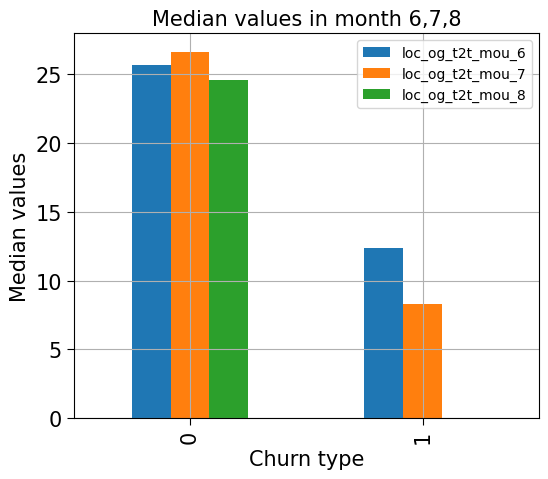

In [143]:
# plot to visualize loc_og_t2t_mou_6
plot_median_values(telecomHighValue, "churn", ["loc_og_t2t_mou_6", "loc_og_t2t_mou_7", "loc_og_t2t_mou_8"], figsize=[6,5])


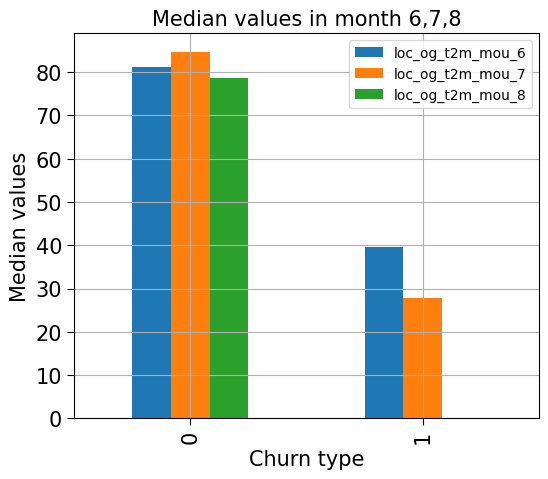

In [144]:
# plot to visualize loc_og_t2m_mou
plot_median_values(telecomHighValue, "churn", ["loc_og_t2m_mou_6", "loc_og_t2m_mou_7", "loc_og_t2m_mou_8"], figsize=[6,5])


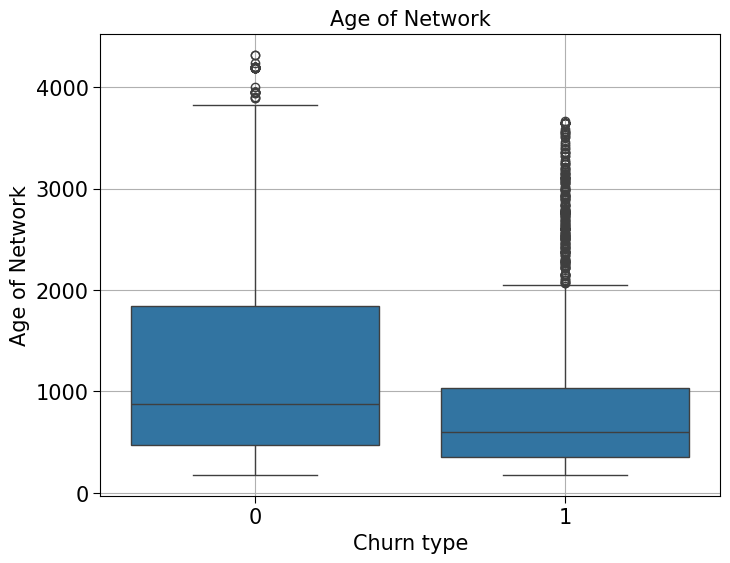

In [145]:
# Plot to visualize age of network
plt.figure(figsize=[8,6])
sns.boxplot(data=telecomHighValue,x="churn",y="aon")
plt.tick_params(size=5,labelsize = 15) 
plt.title("Age of Network",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.ylabel("Age of Network",fontsize=15)
plt.grid(0.3)
plt.show()

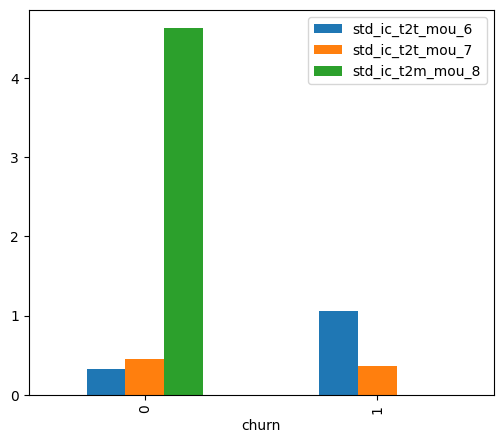

In [146]:
telecomHighValue.groupby("churn")[["std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2m_mou_8"]].median().plot.bar(figsize=[6,5])
plt.show()

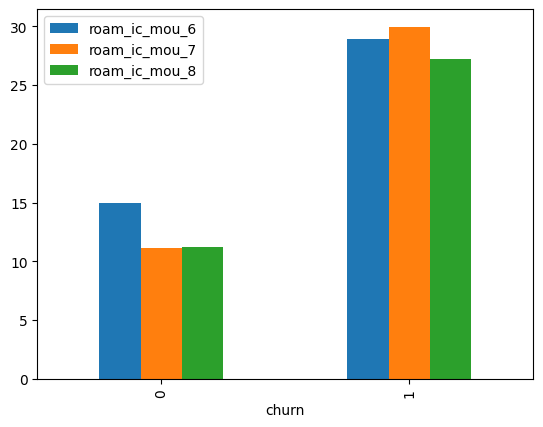

In [147]:
telecomHighValue.groupby("churn")[["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8"]].mean().plot.bar()
plt.show()

As roaming in incoming minutes is more, they are likely to churn more.

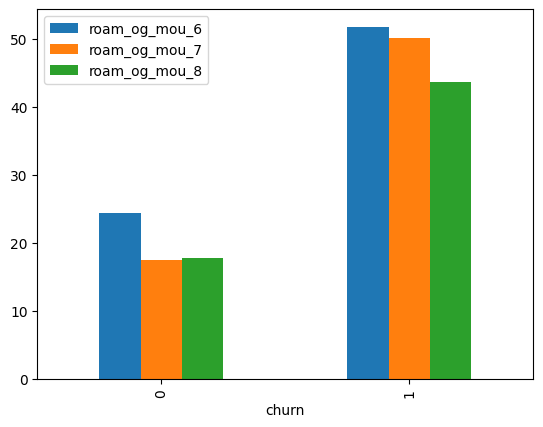

In [148]:
telecomHighValue.groupby("churn")[["roam_og_mou_6","roam_og_mou_7","roam_og_mou_8"]].mean().plot.bar()
plt.show()

As roaming in outgoing minutes is more, Users are more likely to churn.

In [149]:
telecomHighValue.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,1,1961.9650,-3.97,-184.385,6.78,19.895,-222.245,9

Model Building

In [150]:
#Load required library
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

Train test split of data

In [151]:
# Perform the train test split 
train, test = train_test_split(telecomHighValue, test_size=0.2, random_state=48)

In [152]:
# Check the training and testing data shape
print(f"Train data shape: {train.shape}")
print(f"Test data shape: {test.shape}")

Train data shape: (24000, 164)
Test data shape: (6001, 164)


In [153]:
# List of categorical columns
cat_columns = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "fb_user_6", "fb_user_8", "fb_user_7"]

In [154]:
train[cat_columns].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_8,fb_user_7
33114,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4101,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
40361,0.0,0.0,0.0,1.0,1.0,1.0
11213,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14484,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [155]:
# Calculate categorical features mean and replace those with categorical value
mapping = {}
for col in cat_columns:
    mapping[col] = train.groupby(col)["churn"].mean().to_dict()

In [156]:
# Convert categorical to Numeric features by aggregation and replace in train and test data
train.replace(mapping, inplace=True)
test.replace(mapping, inplace=True)

In [157]:
# Segregate X_train and y_train 
y_train = train.pop("churn")
X_train = train

In [158]:
# Segregate X_test and y_test
y_test = test.pop("churn")
X_test = test

Perform Oversampling with SMOTE

As we have imbalance data set, we will oversample only the training set data

In [159]:
# !pip install imblearn
# Perform oversampling with traing data and pass both X_train and y_train to SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=48)
X_train_resample,y_train_resample = smote.fit_resample(X_train,y_train)
# Check the shape after Oversampling
print(f"Shape of train data after oversampling: {X_train_resample.shape}")
print(f"Value count of training target variable:\n{y_train_resample.value_counts()}")

Shape of train data after oversampling: (44082, 163)
Value count of training target variable:
churn
1    22041
0    22041
Name: count, dtype: int64


Now the non-churn and churn data is balanced.


Scaling:

We need to perform the scaling to feed the scaled data to PCA.


Using minmax scaling

In [160]:
# Import library and perform scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scale = MinMaxScaler()
temp_x_train = scale.fit_transform(X_train_resample)

#Form the dataframe after scaling
X_train_scale = pd.DataFrame(temp_x_train,columns=X_train.columns)
# Check the shape of scaled data
X_train_scale.shape

(44082, 163)

In [161]:
# check the scaled train data head 
X_train_scale.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.088949,0.079537,0.035792,0.012317,0.033941,0.010586,0.113348,0.222906,0.043536,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001219,0.000349,0.001095,0.009311,0.003848,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000842,0.006837,0.002812,0.012334,0.032967,0.010291,0.113374,0.227516,0.042346,0.0,0.0,0.0,0.122559,0.217668,0.048155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.122371,0.213962,0.049474,0.001132,0.006249,0.000000,0.008506,0.045379,0.014468,0.000000,0.000000,0.000000,0.006936,0.034184,0.012467,0.005046,0.008226,0.011565,0.023190,0.016396,0.048285,0.000000,0.0,0.0,0.027416,0.019819,0.048169,0.020384,0.046792,0.044844,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.022801,0.057971,0.036232,0.014379,0.028115,0.004413,0.062344,0.062344,0.033715,0.062344,0.031920,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,1.0,1.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,1.0,1.0,1.0,0.198261,0.000000,0.000000,0.000000,0.000000,0.291331,0.517507,0.312350,0.364979,0.4409,0.413805,0.307091,0.532149,0.591360,0.308923,0.515282,0.470083,0.636286,0.785335,0.623545,0.605428,0.297260,0.423304,0.36747,0.520098,0.658887,0.370292,0.441836
1,0.091309,0.072997,0.044006,0.068476,0.113913,0.105521,0.029152,0.036250,0.016693,0.0,0.0,0.0,0.0,0.0,0.0,0.001104,0.002456,0.001856,0.018993,0.015396,0.023881,0.000000,0.000000,0.000000,0.011163,0.0,0.000000,0.015692,0.011728,0.017163,0.067656,0.112087,0.104010,0.017647,0.030158,0.0082

In [162]:
# Perform the scaling on test set
temp_x_test = scale.transform(X_test)
# form the test set dataframe after scaling
X_test_scale = pd.DataFrame(temp_x_test,columns=X_test.columns)

In [163]:
# check the scaled test data head 
X_test_scale.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.090964,0.075823,0.042129,0.008711,0.010712,0.026989,0.148318,0.286030,0.107864,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.010546,0.012200,0.030885,0.246407,0.605075,0.303640,0.000000,0.000000,0.000000,0.000000,0.002106,0.000000,0.199846,0.380166,0.224896,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.075312,0.006067,0.004641,0.000000,0.0,0.0,0.153950,0.250982,0.123010,0.003793,0.005750,0.005960,0.019729,0.031392,0.017978,0.002318,0.000983,0.000749,0.017828,0.025211,0.020142,0.000000,0.000000,0.000000,0.000000,0.000177,0.000173,0.000000,0.000132,0.000043,0.000000,0.000162,0.000154,0.016466,0.025289,0.023124,0.0167,0.0,0.0,0.0,0.0,0.0,0.000253,0.001377,0.015985,0.029316,0.057971,0.036232,0.014550,0.022809,0.010812,0.027431,0.037406,0.029220,0.027431,0.037406,0.011238,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,1.0,1.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,1.0,1.0,1.0,0.608307,0.000000,0.0,0.0,0.000000,0.305153,0.541374,0.335180,0.364979,0.440900,0.374800,0.359193,0.532149,0.570622,0.343367,0.520059,0.455435,0.636286,0.777376,0.619594,0.601253,0.315762,0.437850,0.367470,0.520098,0.658887,0.370292,0.441836
1,0.091021,0.069884,0.037593,0.000381,0.001873,0.001295,0.039266,0.039306,0.027770,0.027926,0.051939,0.013461,0.087727,0.14056,0.027043,0.000000,0.000000,0.000565,0.000000,0.000000,0.023056,0.000000,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,0.000000,0.015499,0.00000,0.0,

Use X_train_scale and X_test_scale in PCA

PCA:

In [164]:
# Load the library
from sklearn.decomposition import PCA
pc_class = PCA(random_state=60)
X_train_pca = pc_class.fit(X_train_scale)

In [165]:
# Check the explained_variance_ratio_ whihc tells us individual principal component variance.
X_train_pca.explained_variance_ratio_

array([6.03828722e-01, 1.40973466e-01, 9.91154317e-02, 3.07631665e-02,
       1.86234613e-02, 1.18416170e-02, 9.48517693e-03, 8.28397567e-03,
       6.72742609e-03, 6.66712347e-03, 6.48765019e-03, 4.03245817e-03,
       3.54238890e-03, 3.02625968e-03, 2.62601130e-03, 2.36736558e-03,
       2.22188122e-03, 2.11335793e-03, 2.04027556e-03, 1.85954974e-03,
       1.80479201e-03, 1.69169360e-03, 1.44245224e-03, 1.39627769e-03,
       1.38652385e-03, 1.32326361e-03, 1.20520235e-03, 1.16539235e-03,
       1.09180750e-03, 9.87446037e-04, 9.32626959e-04, 8.50296358e-04,
       8.22568605e-04, 8.09298482e-04, 7.93824973e-04, 7.32863860e-04,
       7.15982523e-04, 6.64938151e-04, 6.26470542e-04, 6.16430335e-04,
       5.83678758e-04, 5.55821305e-04, 5.11635538e-04, 4.75816893e-04,
       4.69430587e-04, 4.39348379e-04, 4.29142597e-04, 4.02705896e-04,
       3.62017062e-04, 3.53569262e-04, 3.44779471e-04, 3.28864340e-04,
       3.16731007e-04, 3.00533957e-04, 2.84083300e-04, 2.80172957e-04,
      

In [166]:
# perform the cumulaltive sum of explained variance
var_cumu = np.cumsum(X_train_pca.explained_variance_ratio_)
#Convert explained variance to DataFrame
var_cumu_df = pd.DataFrame({"variance":var_cumu}) 
var_cumu_df.head(30) 

,variance
0,0.603829
1,0.744802
2,0.843918
3,0.874681
4,0.893304
5,0.905146
6,0.914631
7,0.922915
8,0.929642
9,0.936310


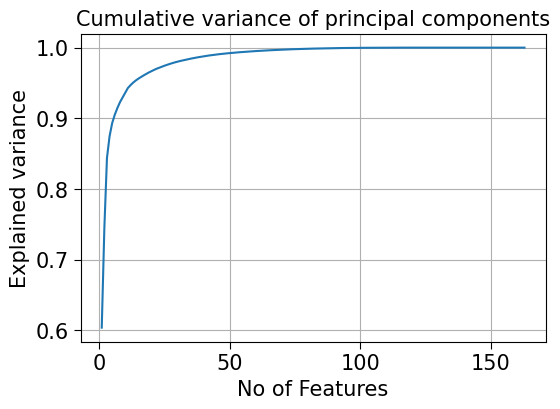

In [167]:
# Plot the cumulative explained variance : SCREE Plot
plt.figure(figsize=[6,4])
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.title("Cumulative variance of principal components",size=15)
plt.ylabel("Explained variance",size=15)
plt.xlabel("No of Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

In [168]:
# By providing variance value we can also get the suitable principal components.
pca_demo = PCA(0.96,random_state=40)
X_train_pca1 = pca_demo.fit_transform(X_train_scale)
print(f"suitable principal components for 96% of variance:{X_train_pca1.shape[1]}")

suitable principal components for 96% of variance:17


Now we got suitable no of principal components as 17
Hence we will do PCA again with 18 components for train and test set.

In [169]:
# Instantiate PCA with 17 components 
pca_object = PCA(n_components=17,random_state=48)
# get the PCs for train data
X_train_pca_final = pca_object.fit_transform(X_train_scale)
# get the PCs for test data
X_test_pca_final = pca_object.fit_transform(X_test_scale)

#check the shape of train and test data after PCA
print(X_train_pca_final.shape)
print(X_test_pca_final.shape)

(44082, 17)
(6001, 17)


In [170]:
# Check the correlations after PCA
np.corrcoef(X_train_pca_final.transpose())

array([[ 1.00000000e+00, -4.96211468e-18,  1.12016677e-17,
        -1.56489747e-18, -8.22793847e-18, -7.49045221e-18,
        -9.05254338e-18,  1.09660269e-18, -3.95482835e-18,
         2.92348002e-17, -2.39569628e-17,  7.07294104e-18,
        -2.92071140e-17, -7.93791283e-18,  1.46082748e-18,
        -3.03521546e-18,  7.57645406e-18],
       [-4.96211468e-18,  1.00000000e+00, -1.59021347e-16,
        -2.85596666e-17,  1.04694425e-17, -4.82469647e-18,
         9.10248924e-18, -3.98942267e-19, -1.25397575e-17,
        -1.12655542e-18, -1.50668022e-17, -5.08271485e-18,
         1.27257455e-17,  1.09522478e-18, -9.74187636e-18,
        -7.52035423e-18, -4.57151417e-18],
       [ 1.12016677e-17, -1.59021347e-16,  1.00000000e+00,
        -2.93640246e-17, -3.83604499e-18, -6.67366889e-18,
        -3.66248461e-18,  3.15778343e-18, -4.88071994e-18,
         2.82850533e-18, -3.10630895e-18,  1.53562839e-18,
         6.72609840e-18, -1.90328333e-17, -9.46486627e-18,
        -1.65395988e-17, -1.3

The correlation values are almost close to 0( power raised to -17,-18,-19) except the diagonal.

Model Building:
We will explore below models.
Logistic regression
Decision tree
Randomforest
Gradientboosting
XGboost

In [171]:
#Function definition to check the performance of model on test data
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
# Check the performance on test set
#Precision
#recall
#f1_score
#ROC_AUC
def calculate_peformance_testdata(model_name,y_test,y_pred,pred_prob):
        
    '''y_test:Test Labels,
       y_pred: Prediction Labels ,
       pred_prob:Predicted Probability  '''
    
    print(f"{model_name}:")
    precision = metrics.precision_score(y_test,y_pred)
    print(f"precision: {precision}")
    recall = metrics.recall_score(y_test,y_pred)
    print(f"recall: {recall}")
    f1_score = metrics.f1_score(y_test,y_pred)
    print(f"f1_score: {f1_score}")
    roc_auc = metrics.roc_auc_score(y_test,pred_prob)
    print(f"roc_auc: {roc_auc}")
#     return a DataFrame with all the score
    return pd.DataFrame({"Model":[model_name],"precision":[precision],"recall":[recall],"f1_score":[f1_score],
                         "roc_auc":[roc_auc]})

In [172]:
# Create a DataFrame which stores all test score for each model
score_df = pd.DataFrame({"Model":[None],"precision":[None],"recall":[None],"f1_score":[None],"roc_auc":[None]})

Logistic regression

In [173]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#Instantiate logistic regression
lr_obj = LogisticRegression(random_state=40)
#pass PCA data as input
lr_obj.fit(X_train_pca_final, y_train_resample)
cv_score = cross_val_score(lr_obj, X_train_pca_final, y_train_resample, cv=5, scoring='f1_micro')
print(f"Cross validation score: {cv_score}")

Cross validation score: [0.82862652 0.84439152 0.84017695 0.83824864 0.83938294]


In [174]:
#Prediction on  pca testdata
y_pred_lr = lr_obj.predict(X_test_pca_final)
#check predict probability on pca data
pred_prob = lr_obj.predict_proba(X_test_pca_final)

In [175]:
#check various scores on test data
df1 = calculate_peformance_testdata("LogisticRegression",y_test,y_pred_lr,pred_prob[:,1])

LogisticRegression:
precision: 0.09193054136874361
recall: 0.5601659751037344
f1_score: 0.15794091839719218
roc_auc: 0.5757158033470193


In [176]:
#Add the score to dataframe for comparision with other model performance
score_df= score_df.dropna()
score_df = pd.concat([score_df, df1])
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.091931,0.560166,0.157941,0.575716


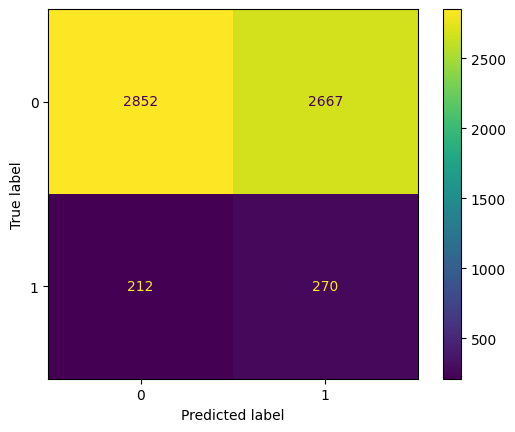

In [177]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lr_obj.predict(X_test_pca_final))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

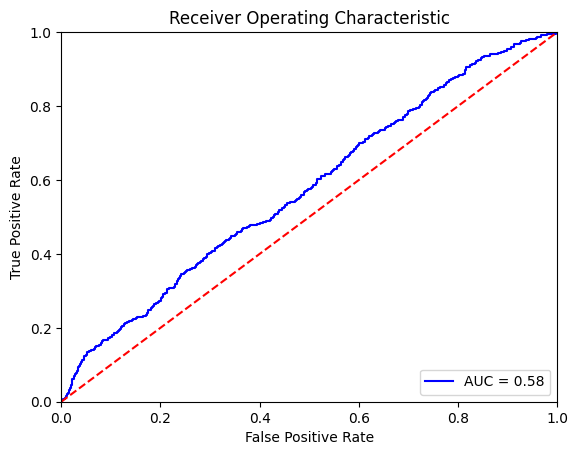

In [178]:
# calculate the fpr and tpr for all thresholds of the classification
probs = lr_obj.predict_proba(X_test_pca_final)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

DecisionTree
X_train_resample,y_train_resample

In [179]:
from sklearn.tree import DecisionTreeClassifier
#Instantiate Decision tree with defautl parameter
dt_obj=  DecisionTreeClassifier(random_state=40)

# here we have used data generated by SMOTE. 
dt_obj.fit(X_train_scale, y_train_resample)
cv_score = cross_val_score(dt_obj, X_train_scale, y_train_resample, cv=5, scoring='f1_micro')
print(cv_score)

[0.88125213 0.92491777 0.92343466 0.93160163 0.93216878]


In [180]:
#check the default paramters 
dt_obj.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 40,
 'splitter': 'best'}

In [181]:
#Perform hyperparamter tuning with randomizedsearchcv
param_grid = dict({"max_leaf_nodes":[4,5,6],"min_samples_leaf":[3,4,5],'min_samples_split':[3,4,5]})
dt_clf = DecisionTreeClassifier(random_state=40)
dt_clf_rcv = RandomizedSearchCV(dt_clf,param_grid,cv=5,scoring="f1_micro")# n_jobs=-1
dt_clf_rcv.fit(X_train_scale, y_train_resample)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
                   param_distributions={'max_leaf_nodes': [4, 5, 6],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [3, 4, 5]},
                   scoring='f1_micro')

In [182]:
#check the beat score and best estimator paramters
print(dt_clf_rcv.best_score_)
print(dt_clf_rcv.best_estimator_)

0.8546802785906701
DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=3,
                       min_samples_split=5, random_state=40)


In [183]:
# dt_clf_rcv.cv_results_
#Train the decision tree with best paramters obtained from above step
# Commented out the hyperparamter tuning as it takes sometime to execute
dt_clf = DecisionTreeClassifier(max_leaf_nodes=6,min_samples_leaf=4,min_samples_split=5,random_state=40)
dt_clf.fit(X_train_scale,y_train_resample)

DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=4,
                       min_samples_split=5, random_state=40)

In [184]:
#perform the prediction 
y_pred_dt = dt_clf.predict(X_test_scale)
#Perform the prediction probability
pred_prob = dt_clf.predict_proba(X_test_scale)

In [185]:
##check the scores.
df2 = calculate_peformance_testdata("DecisionTree",y_test,y_pred_dt,pred_prob[:,1])

DecisionTree:
precision: 0.33690360272638753
recall: 0.7178423236514523
f1_score: 0.45858184227965537
roc_auc: 0.8510624180969703


In [186]:
#Add the score to Dataframe  for comparision 
score_df = pd.concat([score_df, df2])
score_df.dropna(inplace=True)
score_df.drop_duplicates(inplace=True)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.091931,0.560166,0.157941,0.575716
0,DecisionTree,0.336904,0.717842,0.458582,0.851062


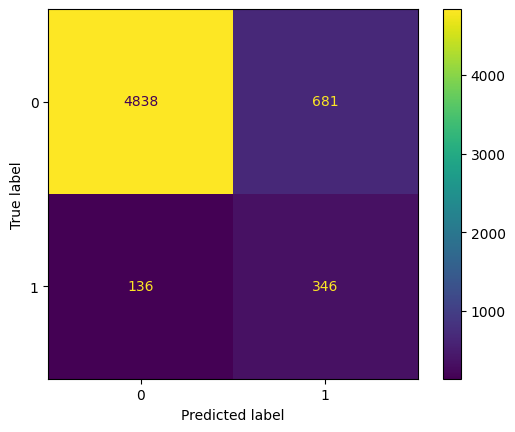

In [187]:
cm = confusion_matrix(y_test, dt_clf.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

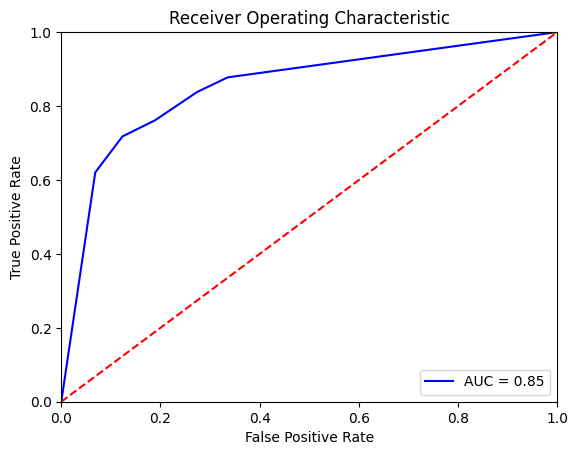

In [188]:
# calculate the fpr and tpr for all thresholds of the classification
probs = dt_clf.predict_proba(X_test_scale)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [189]:
#Instantiate RandomForest, train with default parameters
rf_class = RandomForestClassifier(n_jobs=-1) #class_weight={0:1,1:2}
rf_class.fit(X_train_scale,y_train_resample)
y_pred_rf = rf_class.predict(X_test_scale)
pred_prob = rf_class.predict_proba(X_test_scale)

In [190]:
#check the default parameters
rf_class.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [191]:
#Use best paramters to train the model
rf_class = RandomForestClassifier(min_samples_leaf=3,n_estimators=120,n_jobs=-1,random_state=40)
rf_class.fit(X_train_scale,y_train_resample)
y_pred_rf = rf_class.predict(X_test_scale)
pred_prob = rf_class.predict_proba(X_test_scale)

In [192]:
#check the scores 
df3 = calculate_peformance_testdata("RandomForest",y_test,y_pred_rf,pred_prob[:,1])

RandomForest:
precision: 0.5862708719851577
recall: 0.6556016597510373
f1_score: 0.6190009794319296
roc_auc: 0.9244024227132372


In [193]:
#Add score to the dataframe for comparision 
score_df = pd.concat([score_df, df3])
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.091931,0.560166,0.157941,0.575716
0,DecisionTree,0.336904,0.717842,0.458582,0.851062
0,RandomForest,0.586271,0.655602,0.619001,0.924402


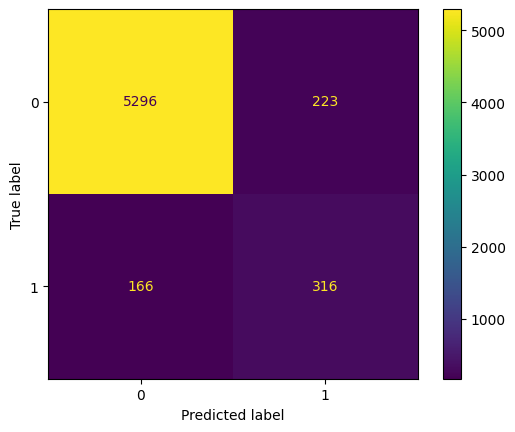

In [194]:
cm = confusion_matrix(y_test, rf_class.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

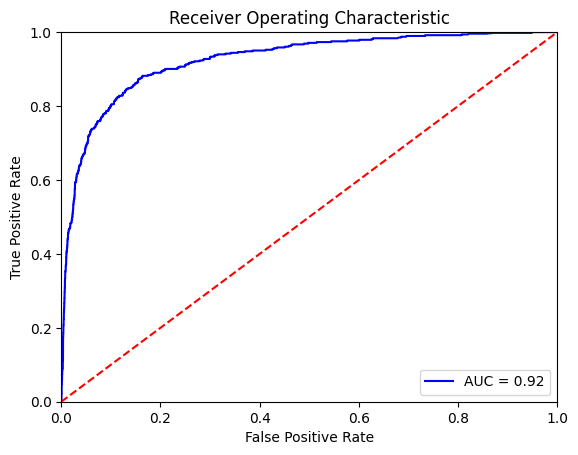

In [195]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rf_class.predict_proba(X_test_scale)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [196]:
#Train gradient boosting with default parameters
from sklearn.ensemble import GradientBoostingClassifier
gb_class = GradientBoostingClassifier(random_state=42,min_samples_leaf=4,min_samples_split=5)
# n_estimators=110,min_samples_leaf=2,min_samples_split=3,learning_rate=0.2
gb_class.fit(X_train_scale,y_train_resample)

#get the predicated label
y_pred_gb = gb_class.predict(X_test_scale)
#get the predicted probability
pred_prob = gb_class.predict_proba(X_test_scale)

In [197]:
#check the training default parameters
gb_class.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [198]:
#Check the test scores
df4 = calculate_peformance_testdata("GradientBoosting",y_test,y_pred_gb,pred_prob[:,1])

GradientBoosting:
precision: 0.48326055312954874
recall: 0.6887966804979253
f1_score: 0.5680068434559453
roc_auc: 0.9197948016621568


In [199]:
#Add the scores to dataframe
score_df=pd.concat([score_df, df4])
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.091931,0.560166,0.157941,0.575716
0,DecisionTree,0.336904,0.717842,0.458582,0.851062
0,RandomForest,0.586271,0.655602,0.619001,0.924402
0,GradientBoosting,0.483261,0.688797,0.568007,0.919795


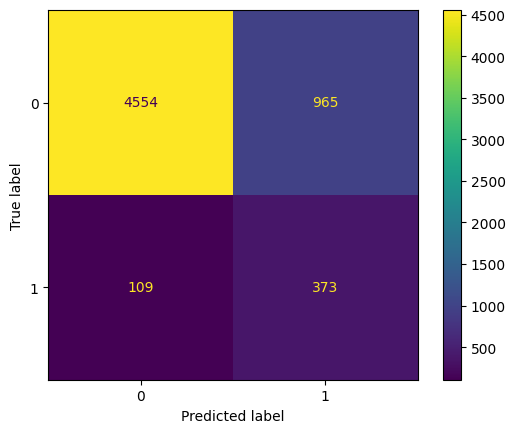

In [200]:
#Plot the confusion matrix
cm = confusion_matrix(y_test, gb_class.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

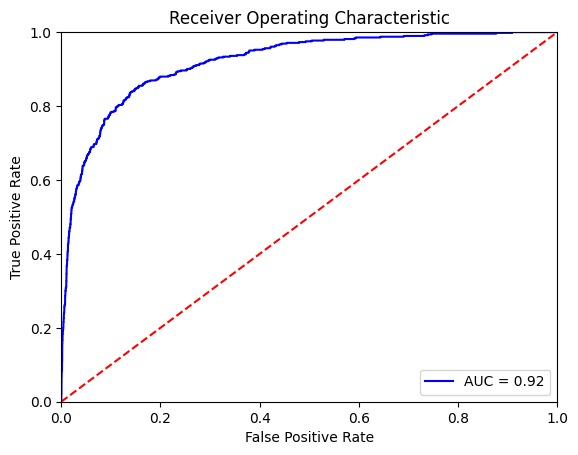

In [201]:
# calculate the fpr and tpr for all thresholds of the classification
probs = gb_class.predict_proba(X_test_scale)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [202]:
import xgboost as xgb
# Model training with default paamters

xgb_class = xgb.XGBClassifier(max_depth=10)
xgb_class.fit(X_train_scale,y_train_resample)

#Model prediction 
y_pred_xgb = xgb_class.predict(X_test_scale)
#Model predict probability
pred_prob = xgb_class.predict_proba(X_test_scale)

In [203]:
#check the model default paramters
xgb_class.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [204]:
#chekc the scores
df5 = calculate_peformance_testdata("XGBoost",y_test,y_pred_xgb,pred_prob[:,1])

XGBoost:
precision: 0.6560975609756098
recall: 0.558091286307054
f1_score: 0.6031390134529149
roc_auc: 0.9295804986019627


In [205]:
#add the score to dataframe
score_df= pd.concat([score_df, df5])
score_df.drop_duplicates()

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.091931,0.560166,0.157941,0.575716
0,DecisionTree,0.336904,0.717842,0.458582,0.851062
0,RandomForest,0.586271,0.655602,0.619001,0.924402
0,GradientBoosting,0.483261,0.688797,0.568007,0.919795
0,XGBoost,0.656098,0.558091,0.603139,0.929580


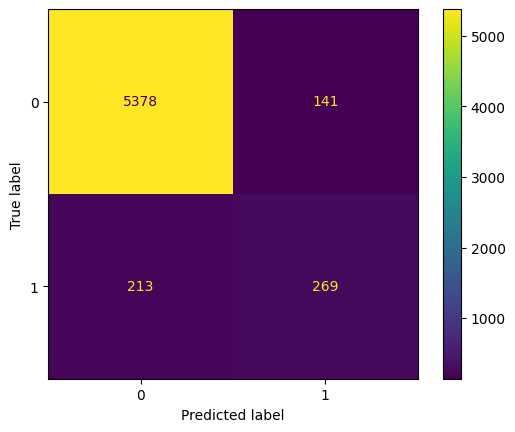

In [206]:
#Plot confusion matrix
cm = confusion_matrix(y_test, xgb_class.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

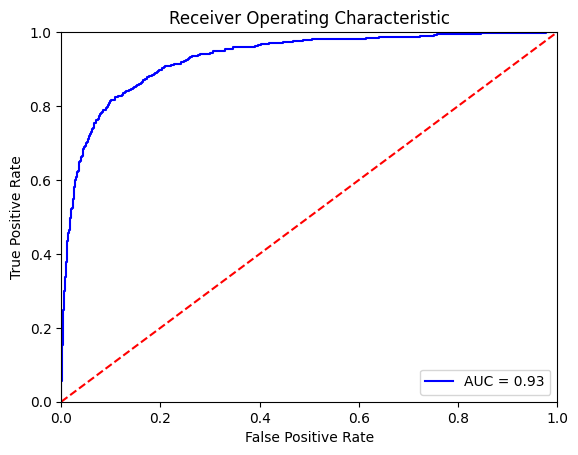

In [207]:
# calculate the fpr and tpr for all thresholds of the classification
probs = xgb_class.predict_proba(X_test_scale)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [208]:
#check how various model is performing on test set on Churn=1.
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.091931,0.560166,0.157941,0.575716
0,DecisionTree,0.336904,0.717842,0.458582,0.851062
0,RandomForest,0.586271,0.655602,0.619001,0.924402
0,GradientBoosting,0.483261,0.688797,0.568007,0.919795
0,XGBoost,0.656098,0.558091,0.603139,0.929580


The randomforest worked well on this data in churn with precision close to 59%, recall close to 65% and f1_score close to 61%.
In Logistic regression we have used PCA.
In this scenario, Without PCA model works well.

Fearure Importance and Model Interpretation

In [209]:
# Randomforest model training 
gb_object = RandomForestClassifier(random_state=40)
gb_object.fit(X_train_resample,y_train_resample)
y_pred = gb_object.predict(X_test)

In [210]:
#check the performance on test data
calculate_peformance_testdata("RandomForest",y_test,y_pred,pred_prob[:,1])

RandomForest:
precision: 0.6056338028169014
recall: 0.6244813278008299
f1_score: 0.6149131767109295
roc_auc: 0.9295804986019627


,Model,precision,recall,f1_score,roc_auc
0,RandomForest,0.605634,0.624481,0.614913,0.92958


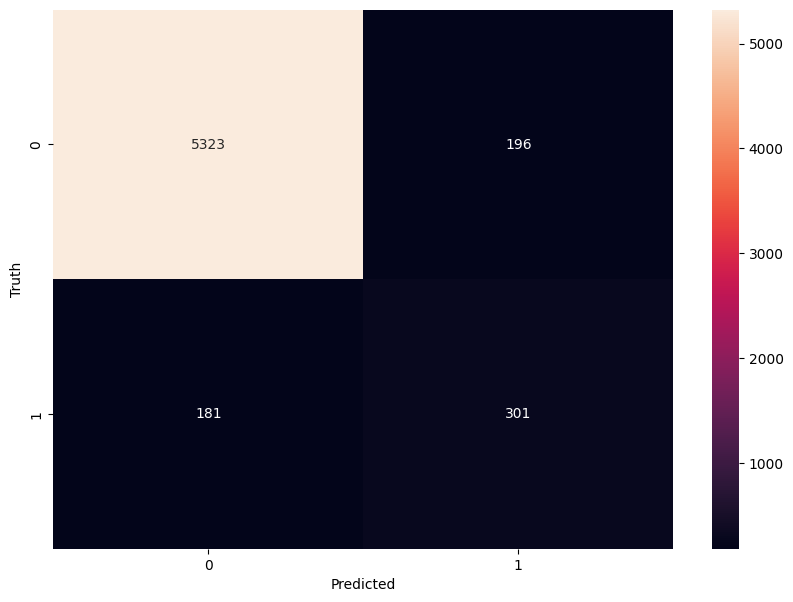

In [211]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, gb_object.predict(X_test))

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

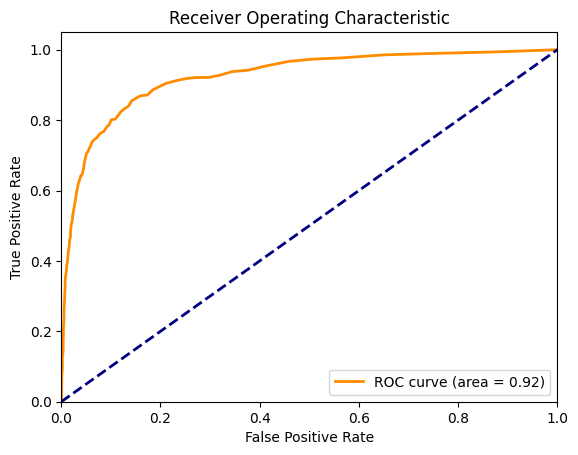

In [212]:
# Calculate the ROC curve points
fpr, tpr, thresholds = metrics.roc_curve(y_test, gb_object.predict_proba(X_test)[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [213]:
#check the classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5519
           1       0.61      0.62      0.61       482

    accuracy                           0.94      6001
   macro avg       0.79      0.79      0.79      6001
weighted avg       0.94      0.94      0.94      6001



In [214]:
#Create a Feature importance dataframe
Feature_importance = pd.DataFrame({"columns":X_train.columns,"feature_importance":gb_object.feature_importances_})

In [215]:
#check 40 important features
fi = Feature_importance.sort_values(by="feature_importance",ascending=False).head(40)
fi

,columns,feature_importance
80,total_ic_mou_8,0.066874
95,total_rech_amt_8,0.043899
134,fb_user_8,0.038620
65,loc_ic_mou_8,0.037469
119,night_pck_user_8,0.037256
11,roam_ic_mou_8,0.035839
59,loc_ic_t2m_mou_8,0.033583
29,loc_og_mou_8,0.027910
2,arpu_8,0.027545
156,total_rech_amt_diff,0.026513


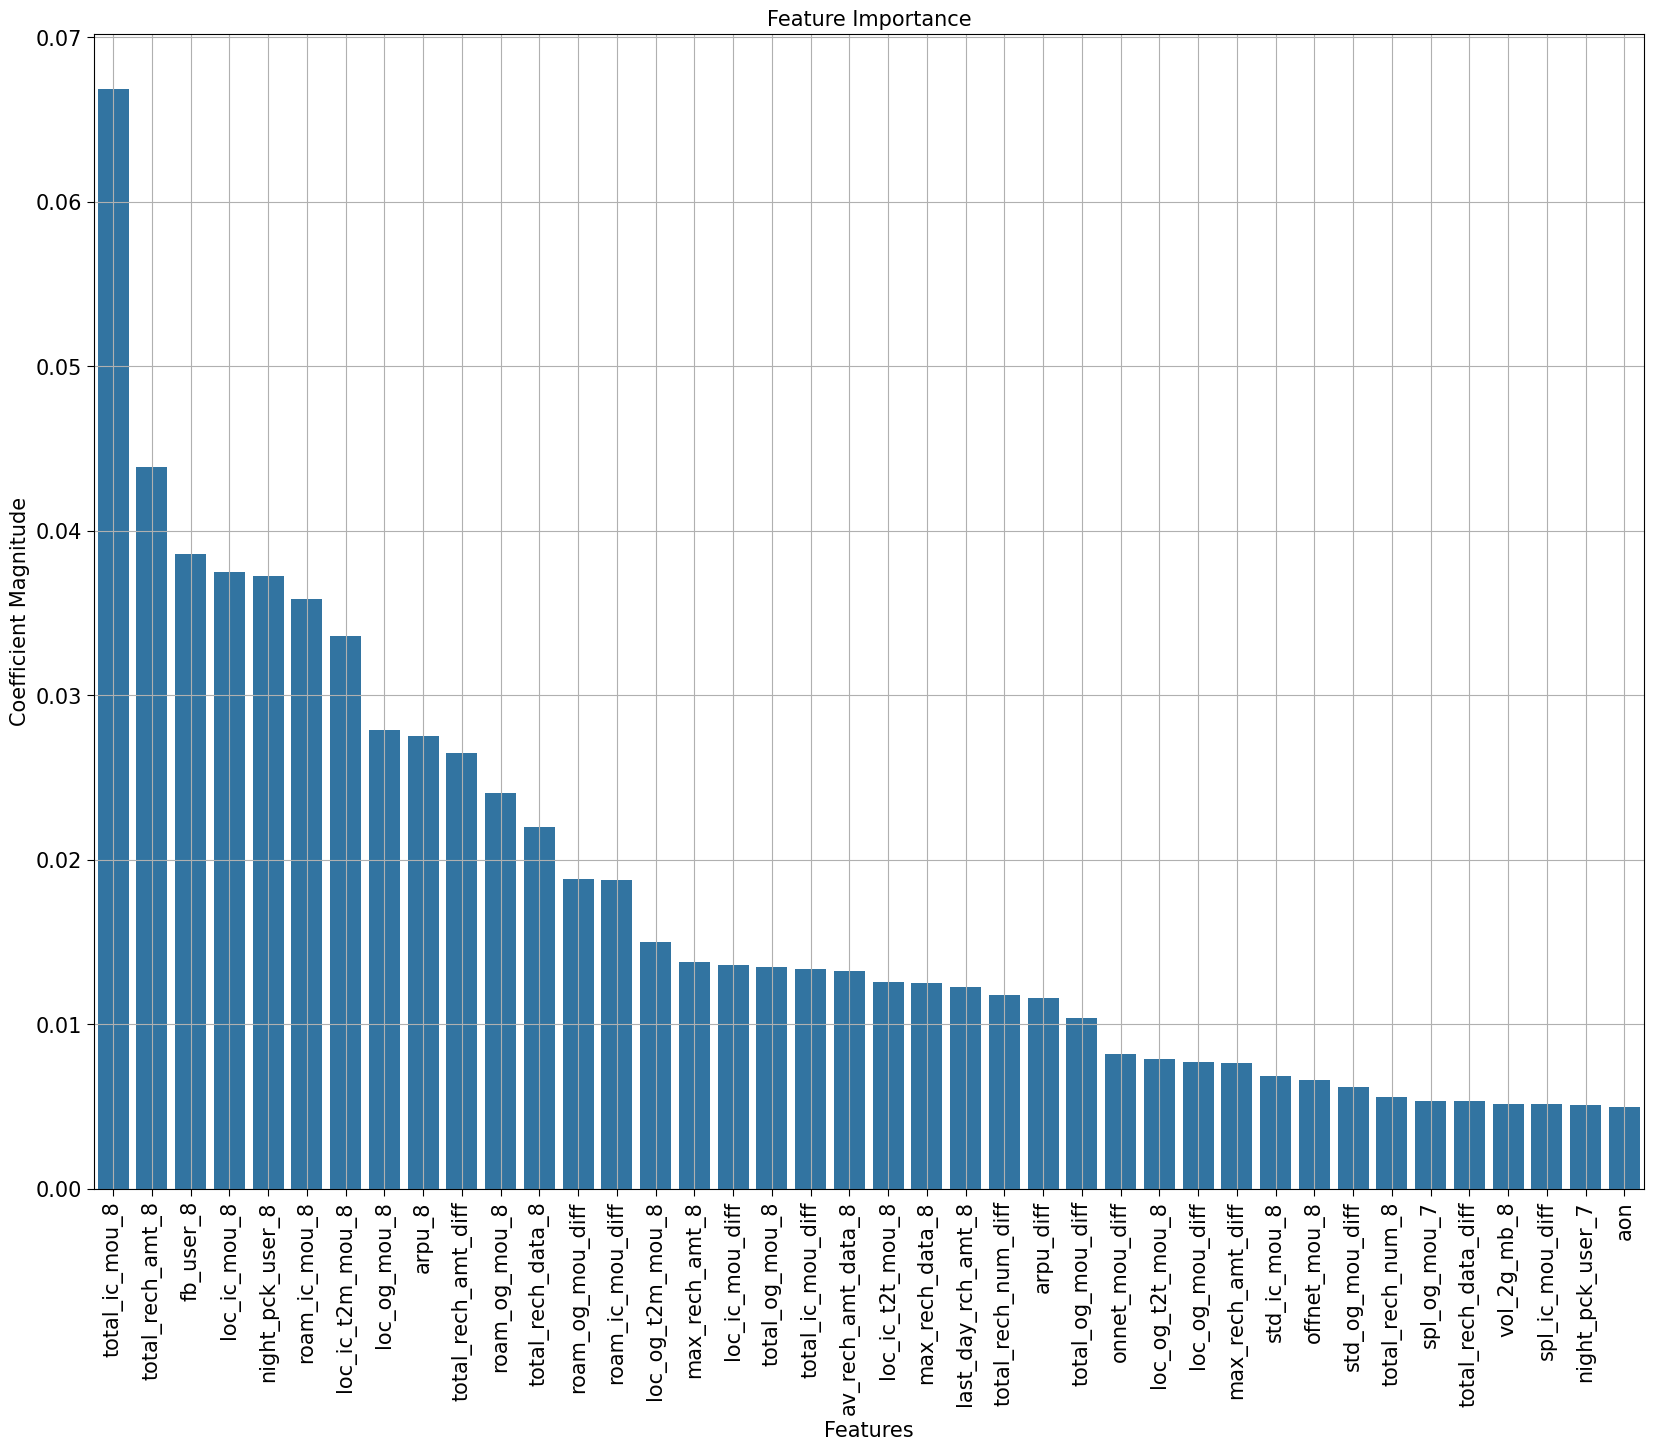

In [216]:
#Plot to show the feature importance
plt.figure(figsize=[20,15])
sns.barplot(x = "columns",y="feature_importance",data=fi)
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

Business Insights

1. Roaming Rates: It is imperative for the telecom company to scrutinize their current roaming rates. There is a significant opportunity to enhance customer satisfaction and retention by offering competitive packages to those customers who frequently utilize services from a roaming zone.

2. STD and ISD Rates: The company should also turn its attention towards the Standard Trunk Dialing (STD) and International Subscriber Dialing (ISD) rates. There is a possibility that these rates are perceived as high by the customers. Introducing tailored STD and ISD packages could be a viable solution to this issue.

3. Customer Feedback: To address the aforementioned issues effectively, it is recommended that the telecom company proactively collects and analyzes customer queries and complaints. This data will provide valuable insights into customer needs and preferences, enabling the company to refine their services accordingly. This customer-centric approach could significantly enhance the overall user experience and foster customer loyalty.